In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [7]:
df_bc=pd.DataFrame(j_bc["prices"],columns=["time","price"])
df_bc

,time,price
0,1569763781187,8014.279938
1,1569767850478,8034.732651
2,1569771597541,7958.094068
3,1569775467720,8023.803836
4,1569779233652,8010.676385
...,...,...
709,1572343446206,9389.344142
710,1572346953947,9467.357416
711,1572350657679,9452.917796
712,1572354333097,9398.917790


In [8]:
url = base + 'coins/dogecoin/market_chart'

In [9]:
param_dict = { 'id':'dogecoin', 
              'vs_currency':'usd', 
              'days':30}

In [10]:
result = requests.get(url, params=param_dict)

In [13]:
j_dc=result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1569763781735,0.002178
1,1569767851512,0.002181
2,1569771592739,0.002271
3,1569775462824,0.002299
4,1569779227011,0.002300
5,1569782962772,0.002174
6,1569786724676,0.002202
7,1569790163446,0.002215
8,1569793836006,0.002219
9,1569797841686,0.002237


In [16]:
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [18]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2019-09-29 13:29:41.187,8014.279938
2019-09-29 14:37:30.478,8034.732651
2019-09-29 15:39:57.541,7958.094068
2019-09-29 16:44:27.720,8023.803836
2019-09-29 17:47:13.652,8010.676385
2019-09-29 18:48:10.746,7987.627938
2019-09-29 19:52:07.662,7947.384495
2019-09-29 20:49:25.584,8011.989623
2019-09-29 21:50:33.921,8053.903821


In [19]:
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2019-09-29 13:29:41.735,0.002178
2019-09-29 14:37:31.512,0.002181
2019-09-29 15:39:52.739,0.002271
2019-09-29 16:44:22.824,0.002299
2019-09-29 17:47:07.011,0.002300
2019-09-29 18:49:22.772,0.002174
2019-09-29 19:52:04.676,0.002202
2019-09-29 20:49:23.446,0.002215
2019-09-29 21:50:36.006,0.002219


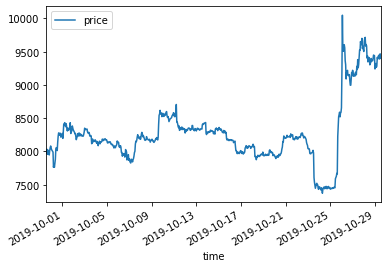

In [20]:
df_bc.plot();

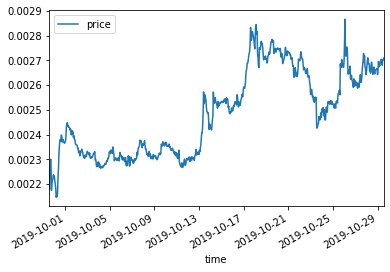

In [21]:
df_dc.plot();

# Top ten coins report

In [22]:
url = base + 'coins/list'

In [23]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,02-token,o2t,O2 Token
2,0chain,zcn,0chain
3,0x,zrx,0x
4,0xcert,zxc,0xcert
5,0xdark,oxd,0xDark
6,10m-token,10mt,10M Token
7,12ships,TSHP,12Ships
8,1337,1337,Elite
9,1irstcoin,fst,1irstcoin


In [28]:
data_df = df_list.iloc[:10,0]
data_df

0       01coin
1     02-token
2       0chain
3           0x
4       0xcert
5       0xdark
6    10m-token
7      12ships
8         1337
9    1irstcoin
Name: id, dtype: object

In [29]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_series = pd.concat(data_list)
data_series

,date_time,price,file_name
0,1546473600000,0.006419,01coin
1,1546560000000,0.006019,01coin
2,1546646400000,0.005852,01coin
3,1546732800000,0.006123,01coin
4,1546819200000,0.005920,01coin
...,...,...,...
235,1572048000000,0.853054,1irstcoin
236,1572134400000,0.877668,1irstcoin
237,1572220800000,0.884037,1irstcoin
238,1572307200000,0.834614,1irstcoin
